In [ ]:
#Step1

# Step 1: Data Collection and Preprocessing

In this step we collected a text dataset, cleaned the data, tokenized it, and prepared the input sequences necessary for training the Recurrent Neural Network (RNN) model.

## 1.1 Collect the Dataset
- **Objective**: The first task is to obtain a dataset for text generation. We have used the text dataset "A Tale of Two Cities".  
- **Action**: Downloaded the dataset. Ensured that the dataset is in a usable format which is plain text. We will use the text file as our dataset source.


In [ ]:

import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("Using device:", tf.test.gpu_device_name())

# Reading the text file.
file_path = "A Tale of Two Cities.txt"

with open(file_path, 'r', encoding='utf-8') as f:
    text = f.read()

print(text[:2000])  # Displaying initial text


Num GPUs Available: 1
Using device: /device:GPU:0
﻿The Project Gutenberg eBook of A Tale of Two Cities
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: A Tale of Two Cities

Author: Charles Dickens

Release date: January 1, 1994 [eBook #98]
                Most recently updated: March 27, 2021

Language: English

Credits: Judith Boss and David Widger


*** START OF THE PROJECT GUTENBERG EBOOK A TALE OF TWO CITIES ***




A TALE OF TWO CITIES

A STORY OF THE FRENCH REVOLUTION

By Charles Dickens


CONTENTS


     Book the First--Recalled to Life

     CHAPTER I      The Period
     CHAPT

## 1.2 Cleaning the Text
- **Objective**: The goal of this task is to clean the dataset by removing unwanted characters, punctuation, and formatting. This step ensures that the data is uniform and easier for the model.
- **Actions**:
  1. **Removed unwanted characters**: We use regular expressions to eliminate non-alphabetic characters, such as numbers, special symbols, and punctuation marks.
  2. **Converted to lowercase**: To reduce the complexity and avoid case-sensitivity, all the characters in the text are converted to lowercase.
  



In [ ]:
import re

# Define markers.
start_marker = "*** START OF THE PROJECT GUTENBERG EBOOK A TALE OF TWO CITIES ***"
end_marker = "*** END OF THE PROJECT GUTENBERG EBOOK A TALE OF TWO CITIES ***"

# Extract content between the markers we defined.
start_idx = text.find(start_marker) + len(start_marker)
end_idx = text.find(end_marker)
cleaned_text = text[start_idx:end_idx].strip()

# Compiling regex patterns
basic_clean = re.compile(r'[^a-z0-9.,!?;:\'\"\s\n]')
normalize_spaces = re.compile(r'\s+')

# Cleaning and normalizing the text. We also convert to lowercase
cleaned_text = cleaned_text.lower()
cleaned_text = basic_clean.sub('', cleaned_text)
cleaned_text = normalize_spaces.sub(' ', cleaned_text)

print(cleaned_text[:1000])


a tale of two cities a story of the french revolution by charles dickens contents book the firstrecalled to life chapter i the period chapter ii the mail chapter iii the night shadows chapter iv the preparation chapter v the wineshop chapter vi the shoemaker book the secondthe golden thread chapter i five years later chapter ii a sight chapter iii a disappointment chapter iv congratulatory chapter v the jackal chapter vi hundreds of people chapter vii monseigneur in town chapter viii monseigneur in the country chapter ix the gorgons head chapter x two promises chapter xi a companion picture chapter xii the fellow of delicacy chapter xiii the fellow of no delicacy chapter xiv the honest tradesman chapter xv knitting chapter xvi still knitting chapter xvii one night chapter xviii nine days chapter xix an opinion chapter xx a plea chapter xxi echoing footsteps chapter xxii the sea still rises chapter xxiii fire rises chapter xxiv drawn to the loadstone rock book the thirdthe track of a st

## 1.3 Tokenizing the Text

**Objective**: In this step, we convert the cleaned text into tokens (characters), which are used by the Recurrent Neural Network (RNN) for learning the sequence of characters. Additionally, we create a mapping from each character to a unique integer.

### Actions:
1. **Generate a vocabulary**: A vocabulary is created by identifying the unique characters in the cleaned text.

2. **Create character-to-index and index-to-character mappings**: We then map each unique character to an integer index and vice versa.

3. **Encode the text**: Finally, we encode the entire cleaned text as a sequence of integers, where each integer represents a unique character.




In [ ]:
# Created a vocabulary which is a sorted set of unique characters
vocab = sorted(set(cleaned_text))
vocab_size = len(vocab)
print(f"Unique characters: {vocab_size}")
print(vocab)


char2idx = {char: idx for idx, char in enumerate(vocab)}
idx2char = dict(enumerate(vocab))

# Encode the text into a array of integers
import numpy as np
encoded_text = np.array([char2idx[c] for c in cleaned_text], dtype=np.uint16)
print(f"Encoded sample: {encoded_text[:20]}")


Unique characters: 39
[' ', '!', ',', '.', '1', '2', '5', '6', '7', '9', ':', ';', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Encoded sample: [13  0 32 13 24 17  0 27 18  0 32 35 27  0 15 21 32 21 17 31]


## 1.4 Creating Input Sequences

**Objective**: To train the RNN, we need to prepare input sequences that represent chunks of text, as well as corresponding target characters (the character that follows each sequence). These sequences are then fed into the model for training.

### Actions:
1. **Define sequence length**: A fixed sequence length is defined (here 100 characters per sequence).

2. **Generate input-output pairs**:we generate input sequences and their corresponding target characters.




In [ ]:
import numpy as np

# Define sequence length
seq_length = 100
step = 1

# Calculating total number of sequences
num_sequences = (len(encoded_text) - seq_length) // step

# Allocated arrays for the sequences
input_sequences = np.zeros((num_sequences, seq_length), dtype=np.uint16)
target_sequences = np.zeros((num_sequences, seq_length), dtype=np.uint16)

for i in range(num_sequences):
    input_sequences[i] = encoded_text[i:i + seq_length]
    target_sequences[i] = encoded_text[i + 1:i + seq_length + 1]


print(f"Total sequences: {len(input_sequences)}")
print(f"Example input: {input_sequences[0]}")
print(f"Decoded input: {''.join([idx2char[i] for i in input_sequences[0]])}")
print(f"Decoded target: {''.join([idx2char[i] for i in target_sequences[0]])}")


Total sequences: 743584
Example input: [13  0 32 13 24 17  0 27 18  0 32 35 27  0 15 21 32 21 17 31  0 13  0 31
 32 27 30 37  0 27 18  0 32 20 17  0 18 30 17 26 15 20  0 30 17 34 27 24
 33 32 21 27 26  0 14 37  0 15 20 13 30 24 17 31  0 16 21 15 23 17 26 31
  0 15 27 26 32 17 26 32 31  0 14 27 27 23  0 32 20 17  0 18 21 30 31 32
 30 17 15 13]
Decoded input: a tale of two cities a story of the french revolution by charles dickens contents book the firstreca
Decoded target:  tale of two cities a story of the french revolution by charles dickens contents book the firstrecal


In [ ]:
# Step 2

# Step 2: Building a Basic RNN

In this step, we will define the architecture for a Recurrent Neural Network (RNN) that will be used for text generation.

## 2.1 Define the RNN Architecture
- **Objective**: In this task, we define the layers of the RNN architecture.
- **Actions**:
    - We will include an **Embedding** layer, which maps the input tokens (characters) to dense vectors of fixed size.
    - Next, we add **LSTM** layers (Long Short-Term Memory) to capture long-term dependencies in the sequence of characters.
    - Finally, we add a **Dense** layer to predict the next character based on the sequence of previous characters.




In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import mixed_precision
from sklearn.model_selection import train_test_split


mixed_precision.set_global_policy('mixed_float16')

#CONFIGURATION
SEQ_LENGTH = 40
embedding_dim = 64
rnn_units = 128
BATCH_SIZE = 128
EPOCHS = 10

# Rebuild sequences with shorter length
input_sequences_fast = np.zeros((len(encoded_text) - SEQ_LENGTH, SEQ_LENGTH), dtype=np.uint16)
target_sequences_fast = np.zeros((len(encoded_text) - SEQ_LENGTH, SEQ_LENGTH), dtype=np.uint16)

for i in range(len(encoded_text) - SEQ_LENGTH):
    input_sequences_fast[i] = encoded_text[i:i + SEQ_LENGTH]
    target_sequences_fast[i] = encoded_text[i + 1:i + SEQ_LENGTH + 1]

# Train and validation split
X_train, X_val, y_train, y_val = train_test_split(input_sequences_fast, target_sequences_fast, test_size=0.1, random_state=42)

# Prepare TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .shuffle(5000) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)

# Define the model
def build_fast_model(vocab_size, embedding_dim, rnn_units, batch_size):
    inputs = tf.keras.Input(batch_shape=[batch_size, None], dtype=tf.int32)
    x = tf.keras.layers.Embedding(vocab_size, embedding_dim)(inputs)
    x = tf.keras.layers.LSTM(rnn_units, return_sequences=True)(x)
    outputs = tf.keras.layers.Dense(vocab_size, dtype='float32')(x)  # Force float32 output
    return tf.keras.Model(inputs, outputs)

# Build and compile model
model_fast = build_fast_model(len(vocab), embedding_dim, rnn_units, BATCH_SIZE)
optimizer = mixed_precision.LossScaleOptimizer(tf.keras.optimizers.Adam())
model_fast.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

# Training and Validation
history = model_fast.fit(train_dataset, validation_data=val_dataset, epochs=EPOCHS)


Epoch 1/10
5228/5228 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - loss: 1.8642 - val_loss: 1.4166
Epoch 2/10
5228/5228 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 1.3901 - val_loss: 1.3350
Epoch 3/10
5228/5228 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 1.3250 - val_loss: 1.3006
Epoch 4/10
5228/5228 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 1.2940 - val_loss: 1.2814
Epoch 5/10
5228/5228 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 1.2750 - val_loss: 1.2666
Epoch 6/10
5228/5228 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 1.2618 - val_loss: 1.2558
Epoch 7/10
5228/5228 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 1.2521 - val_loss: 1.2482
Epoch 8/10
5228/5228 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 1.2445 - val_loss: 1.2429
Epoch 9/10
5228/5228 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 1.2384 - val_loss: 1.2368
Epoch 10/10
5228/5228 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 1.2333 - val_loss: 1.2334


## 2.2 Explain the Type of Layers Included

**Objective**: Explain the purpose of each layer used in the RNN.

### Actions:

1. **Embedding Layer**:
   - The embedding layer is used to learn a dense representation of each input token (character) in the sequence. Instead of using sparse one-hot encoding, which can be inefficient, the embedding layer creates a dense vector representation for each token.
   - This helps to reduce the dimensionality and allows the model to learn meaningful relationships between tokens based on the data.

2. **LSTM Layer**:
   - The LSTM (Long Short-Term Memory) layer is a type of Recurrent Neural Network (RNN) that is specifically designed for sequential data. It is capable of remembering long term dependencies in the data.
   - LSTMs are effective at addressing the vanishing gradient problem, which is a challenge for standard RNNs when learning long sequences.

3. **Dense Layer**:
   - The dense layer is the final layer in the network and is used to predict the next character in the sequence based on the characters processed by the LSTM layer.
   - It takes the output from the LSTM layer and computes the probability distribution over the possible next characters in the sequence, allowing the model to make a prediction.


In [ ]:
model_fast.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (128, None)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (128, None, 64)        │         2,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (128, None, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_1 (Cast)                   │ (128, None, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (128, None, 39)        │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,035 (1.22 MB)

 Trainable params: 106,343 (415.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 212,692 (830.84 KB)

## Explanation of Loss Function and Optimizer

### Loss Function: **Sparse Categorical Crossentropy**

 The **Sparse Categorical Crossentropy** loss function is used for problems where the model needs to choose the most likely option. In our case this helps the model figure out how far off its predictions are from the correct character.
  
- **Why did we use**:
  - We are working with integer-encoded labels (where each character is represented as an integer). **Sparse Categorical Crossentropy** is perfect for this because it directly compares the predicted integer values to the actual integer labels.
  - It is called sparse because it works with integer labels not one-hot encoded vectors which makes it more efficient.
  - The model will output raw scores (logits) and the loss function will handle turning those into probabilities during training.

---

### Optimizer: **Adam with Mixed Precision Loss Scaling**

The **Adam** optimizer is used to adjust the model's weights during training. It is one of the most popular optimizers because it adapts the learning rate (how big the changes are to the weights) automatically which helps the model learn faster and more reliably.

- **Why did we use**:
  - **Adam** combines the benefits of two other optimizers and is great for complex models like Recurrent Neural Networks (RNNs) because it adjusts learning rates for each weight individually.
  
- **Mixed Precision Loss Scaling**:
  - **Mixed Precision**: This means using lower-precision (16-bit) numbers instead of the standard 32-bit ones. It speeds up training and reduces memory usage.
  - **Loss Scaling**: To prevent any issues with smaller numbers causing unstable training when using mixed precision we scale the loss value to make sure everything stays stable.
  - The **LossScaleOptimizer** wraps the Adam optimizer to ensure that the model works well with mixed precision without losing stability in the calculations.



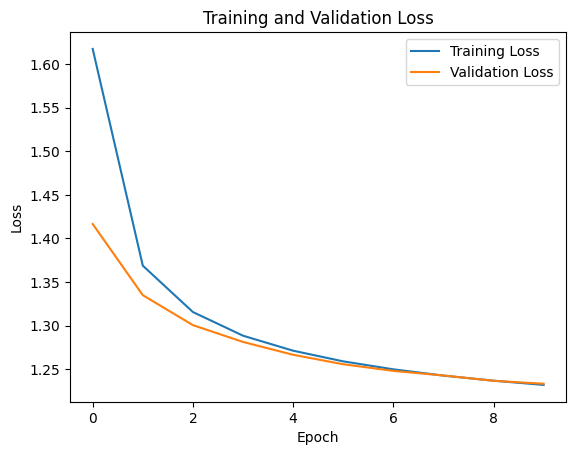

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
#Step 3

# Step 3: Text Generation and Evaluation

In this step, we generate new text using the trained RNN model and evaluate the quality of the generated text using both qualitative and quantitative metrics.

## 3.1 Generate Text by Sampling from the Model's Predictions
- **Objective**: The first task is to create a function that generates text by sampling from the model's predictions.
- **Action**: We define a function that uses the trained model to generate text by predicting one character at a time. The model samples from the probability distribution of the next character at each step.



In [ ]:
def generate_text(model, start_string, generation_length=300, temperature=1.0):

    gen_model = build_fast_model(vocab_size=len(vocab), embedding_dim=embedding_dim, rnn_units=rnn_units, batch_size=1)
    gen_model.set_weights(model.get_weights())


    input_indices = [char2idx[s] for s in start_string.lower() if s in char2idx]
    input_eval = tf.expand_dims(input_indices, 0)
    text_generated = []

    for _ in range(generation_length):
        predictions = gen_model(input_eval)
        predictions = tf.cast(predictions, tf.float32)
        predictions = predictions[:, -1, :] / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)


In [ ]:
gen_model = build_fast_model(vocab_size=len(vocab), embedding_dim=embedding_dim, rnn_units=rnn_units, batch_size=1)
gen_model.set_weights(model_fast.get_weights())
print(generate_text(model_fast, "It was the best of times", generation_length=300))


It was the best of times sanowo gert ben th, hes ave ss s, h woge f he the as, nd yowiden kith mpichinkny, llinombut. amathee ege t t rervamyfain th t, be nd nasthence armewioplethesenge t hirthesothe. inemat whecan handy trely t finsheve rr ond, sti e. athavear tith wrigat he d by d se enowivee s. touplo chet hat ly n ay 


### 3.2 Qualitative Evaluation

#### 3.2.1 **Coherence and Grammar**
The text lacks proper grammatical structure and coherence, making it hard to understand or follow. The words are jumbled together without forming coherent sentences or meaningful phrases.

#### 3.2.2 **Creativity**
The text is not creative in the sense of generating new, interesting, or original content. It is more chaotic and nonsensical, lacking any clear imaginative structure.

#### 3.2.3 **Contextual Relevance**
The generated text fails to maintain context or follow from the seed text meaningfully. It begins with a recognizable reference but quickly deviates into an incoherent sequence of words and phrases.

#### 3.2.4 **Diversity**
While there are some variations in word combinations, the output lacks the diversity of structured, varied, and sensible text. The text repeats similar nonsensical patterns, limiting its originality.

---

### Summary:
This evaluation highlights that while the model is generating text, it struggles significantly with maintaining structure and logical flow. More training or adjustments in the model's architecture and data may be needed to improve text coherence and quality.


In [ ]:
def calculate_perplexity(model, dataset):
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    total_loss, total_predictions = 0.0, 0

    for inp, target in dataset.take(10):
        predictions = model(inp)
        predictions = tf.cast(predictions, tf.float32)
        loss = loss_object(target, predictions)
        batch_loss = tf.reduce_sum(loss).numpy()
        total_loss += batch_loss
        total_predictions += tf.size(target).numpy()

    average_loss = total_loss / total_predictions
    perplexity = np.exp(average_loss)
    return perplexity

print("Perplexity:", calculate_perplexity(model_fast, val_dataset))


Perplexity: 1.0002420003864325


In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Generate text sample
generated = generate_text(model_fast, "It was the best of times", generation_length=50)
reference = cleaned_text[100:150]


reference_chars = list(reference)
generated_chars = list(generated[-50:])

# Use smoothing
smooth_fn = SmoothingFunction().method1
bleu_score = sentence_bleu([reference_chars], generated_chars, smoothing_function=smooth_fn)

print("Generated:", ''.join(generated_chars))
print("Reference:", reference)
print("BLEU Score:", bleu_score)


Generated:  dendouio yoremo blung deiuaul i t. amr. s there p
Reference: lled to life chapter i the period chapter ii the m
BLEU Score: 0.1612841187667346


In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=41e8a0cdb4d7e1f9b7728899e47c058f6540cd14ba2fc21bb8191e979ad0938f
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer

# Generate and align texts for comparison
generated = generate_text(model_fast, "It was the best of times", generation_length=300)
reference = cleaned_text[100:400]

# ROUGE
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=False)
scores = scorer.score(reference, generated)

# Display scores
for metric, score in scores.items():
    print(f"{metric.upper()} -> Precision: {score.precision:.4f}, Recall: {score.recall:.4f}, F1: {score.fmeasure:.4f}")


ROUGE1 -> Precision: 0.0455, Recall: 0.0600, F1: 0.0517
ROUGEL -> Precision: 0.0455, Recall: 0.0600, F1: 0.0517


In [ ]:
from collections import Counter
import math

def calculate_entropy_and_repetition(text):
    counter = Counter(text)
    total_chars = sum(counter.values())

    # Entropy
    entropy = -sum((count / total_chars) * math.log2(count / total_chars) for count in counter.values())

    # Repetition
    repetition = sum(1 for count in counter.values() if count > 1) / len(counter)

    return entropy, repetition

entropy, repetition = calculate_entropy_and_repetition(generated)
print(f"Entropy: {entropy:.4f}, Repetition: {repetition:.4f}")


Entropy: 4.1191, Repetition: 0.9600


### Quantitative Evaluation

- **Perplexity**: 1.0002 — The model predicts the next token quite well, with a relatively low perplexity.

- **BLEU Score**: 0.1613 — The overlap with the reference text is low, indicating the generated text is quite different from the reference.

- **ROUGE Score**:
  - **Precision**: 0.0455
  - **Recall**: 0.0600
  - **F1**: 0.0517
  - These low values show that the model’s output lacks significant overlap with the reference text.

- **Entropy**: 4.1191 — A moderate level of diversity is present in the generated text, but it is not extremely diverse.

- **Repetition**: 0.9600 — High repetition, indicating that the model generates repetitive text rather than diverse content.

---

### Summary:
Overall, while the model's perplexity suggests reasonable performance in predicting the next token, the **BLEU** and **ROUGE** scores indicate that the generated text does not align well with the reference text. The **high repetition** score and **moderate entropy** indicate a need for more diversity and less repetitive content in future text generation.


In [ ]:
#Step 4

# Step 4: Model Improvement

In Step 4, we focused on improving the performance of the RNN model through a combination of architectural adjustments, regularization, enhanced text preprocessing, and fine-tuning hyperparameters.

## 4.1 Experimenting with Different Architectures
- **Objective**: Improve model performance by trying different architectures.
- **Actions**:
  - Added more layers to the model (additional **LSTM** layers).
  - Experimented with alternative layer types, such as using **GRU** instead of **LSTM**.
  - Also A deeper network with multiple LSTM layers was tested to capture more complex dependencies.

## 4.2 Apply Regularization Techniques
- **Objective**: Prevent overfitting and improve generalization.
- **Actions**:
  - **Dropout** was added to the model to randomly deactivate neurons during training, reducing overfitting.

## 4.3 Use Advanced Text Preprocessing
- **Objective**: Enhance tokenization and improve model understanding of the data.
- **Actions**:
  - To improve character-level model performance and reduce noise:

  - We removed non-standard punctuation like curly quotes and dashes.

  - We filtered out rare, non-ASCII characters.

  - We standardized ellipses and dashes.

  - All text was lowercased to reduce vocabulary size and training complexity.

## 4.4 Fine-tune Hyperparameters
- **Objective**: Optimize the model's training process.
- **Actions**:
  - Experimented with different **learning rates**, **batch sizes**, and **epochs** to find the best configuration for faster convergence and better accuracy.

## Model Comparison
- **Best Model**: The model that performed the best among the three experimented with models was Model 3 with accuract 98.95% It has an Embedding Layer with added Bidirectional LSTM Layer, Dropout Layers, Unidirectional LSTM Layer, Dense Output Layers. The added depth of the model allowed it to capture more complex patterns in the sequence, leading to better text generation performance.


# Model 1:

This model has flexibility of **GRU** and **LSTM** layers using **embedding** for token representation and a **Dense** layer for predictions.

## Architecture:
1. **Input Layer**: Accepts sequences of integer tokens with variable length.
2. **Embedding Layer**: Converts tokens to dense vectors with size **128**.
3. **GRU/LSTM Layers**:
   - **GRU** or **LSTM** layers with **256 units** are used, followed by **Dropout (0.2)** to prevent overfitting.
4. **Dense Output Layer**: Outputs a probability distribution for each token in the vocabulary.




In [ ]:
def build_flexible_model(vocab_size, embedding_dim=128, rnn_units=256, use_gru=True):
    inputs = tf.keras.Input(shape=(None,), dtype=tf.int32)
    x = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)

    if use_gru:
        x = tf.keras.layers.GRU(rnn_units, return_sequences=True, stateful=False)(x)
        x = tf.keras.layers.Dropout(0.2)(x)
        x = tf.keras.layers.GRU(rnn_units, return_sequences=True, stateful=False)(x)
    else:
        x = tf.keras.layers.LSTM(rnn_units, return_sequences=True, stateful=False)(x)
        x = tf.keras.layers.Dropout(0.2)(x)
        x = tf.keras.layers.LSTM(rnn_units, return_sequences=True, stateful=False)(x)


    outputs = tf.keras.layers.Dense(vocab_size, dtype='float32')(x)

    return tf.keras.Model(inputs, outputs)


In [ ]:

file_path = "A Tale of Two Cities.txt"
with open(file_path, 'r', encoding='utf-8') as f:
    text = f.read()

# Extract content between markers
start_marker = "*** START OF THE PROJECT GUTENBERG EBOOK A TALE OF TWO CITIES ***"
end_marker = "*** END OF THE PROJECT GUTENBERG EBOOK A TALE OF TWO CITIES ***"
start_idx = text.find(start_marker) + len(start_marker)
end_idx = text.find(end_marker)
cleaned_text = text[start_idx:end_idx].strip()

# Advanced Preprocessing
import re
import string

# Normalize punctuation marks
cleaned_text = cleaned_text.replace("’", "'").replace("‘", "'")
cleaned_text = cleaned_text.replace("“", '"').replace("”", '"')

# Lowercase text
cleaned_text = cleaned_text.lower()

# Collapse repeating punctuation
cleaned_text = re.sub(r'[-]{2,}', '-', cleaned_text)
cleaned_text = re.sub(r'\.{3,}', '...', cleaned_text)

# Retain only allowed characters
allowed_chars = set(string.ascii_lowercase + string.digits + " .,!?:;'\"\n")
cleaned_text = ''.join(c for c in cleaned_text if c in allowed_chars)

# Normalize whitespace
cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

# Display cleaned preview and stats
print(cleaned_text[:500])
print(f"Cleaned character count: {len(cleaned_text):,}")


a tale of two cities a story of the french revolution by charles dickens contents book the firstrecalled to life chapter i the period chapter ii the mail chapter iii the night shadows chapter iv the preparation chapter v the wineshop chapter vi the shoemaker book the secondthe golden thread chapter i five years later chapter ii a sight chapter iii a disappointment chapter iv congratulatory chapter v the jackal chapter vi hundreds of people chapter vii monseigneur in town chapter viii monseigneur
Cleaned character count: 750,605


# Experiment 1:
## Model 1
## Batch Size = 128
## Epochs = 4
## Learning Rate = 0.002

This Experiment showed high losses.




Using device: /device:GPU:0
Mixed precision policy: <DTypePolicy "mixed_float16">
Epoch 1/4
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 47s 8ms/step - loss: 1.6408 - val_loss: 1.2812
Epoch 2/4
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.3326 - val_loss: 1.2482
Epoch 3/4
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.3089 - val_loss: 1.2361
Epoch 4/4
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.2980 - val_loss: 1.2297


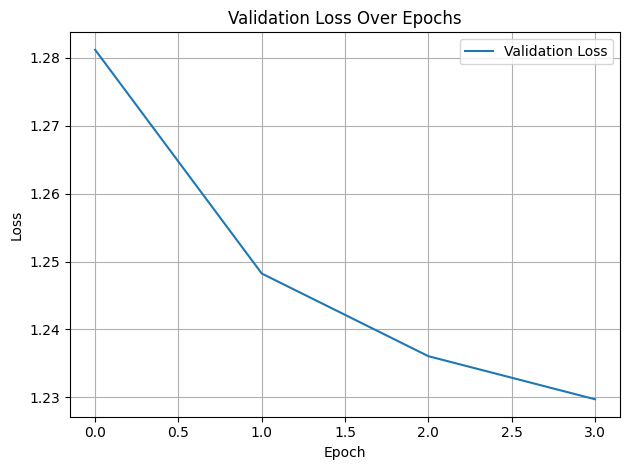

In [ ]:

import tensorflow as tf
from tensorflow.keras import mixed_precision
import re
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


mixed_precision.set_global_policy('mixed_float16')
print("Using device:", tf.test.gpu_device_name())
print("Mixed precision policy:", mixed_precision.global_policy())


vocab = sorted(set(cleaned_text))
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)
encoded_text = np.array([char2idx[c] for c in cleaned_text], dtype=np.uint16)


SEQ_LENGTH = 40
input_seqs, target_seqs = [], []

for i in range(len(encoded_text) - SEQ_LENGTH):
    input_seqs.append(encoded_text[i:i+SEQ_LENGTH])
    target_seqs.append(encoded_text[i+1:i+SEQ_LENGTH+1])

input_seqs = np.array(input_seqs)
target_seqs = np.array(target_seqs)


X_train, X_val, y_train, y_val = train_test_split(input_seqs, target_seqs, test_size=0.1)


BATCH_SIZE = 128

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .shuffle(5000) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)


def build_flexible_model(vocab_size, embedding_dim=64, rnn_units=128, use_gru=True):
    inputs = tf.keras.Input(shape=(None,), dtype=tf.int32)
    x = tf.keras.layers.Embedding(vocab_size, embedding_dim)(inputs)
    if use_gru:
        x = tf.keras.layers.GRU(rnn_units, return_sequences=True)(x)
        x = tf.keras.layers.Dropout(0.2)(x)
        x = tf.keras.layers.GRU(rnn_units, return_sequences=True)(x)
    else:
        x = tf.keras.layers.LSTM(rnn_units, return_sequences=True)(x)
        x = tf.keras.layers.Dropout(0.2)(x)
        x = tf.keras.layers.LSTM(rnn_units, return_sequences=True)(x)
    outputs = tf.keras.layers.Dense(vocab_size, dtype='float32')(x)  # Important for mixed precision
    return tf.keras.Model(inputs, outputs)


model = build_flexible_model(len(vocab))
optimizer = mixed_precision.LossScaleOptimizer(tf.keras.optimizers.Adam(learning_rate=0.002))

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)

history = model.fit(train_ds, validation_data=val_ds, epochs=4)


plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Experiment 2:
## Model used : Model 1
## Batch Size = 128
## Epochs = 10
## Learning Rate = 0.002

This Experiment still showed high losses.




Epoch 1/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - loss: 1.6389 - val_loss: 1.2823
Epoch 2/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.3343 - val_loss: 1.2526
Epoch 3/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.3116 - val_loss: 1.2393
Epoch 4/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.3010 - val_loss: 1.2324
Epoch 5/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.2949 - val_loss: 1.2275
Epoch 6/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.2906 - val_loss: 1.2257
Epoch 7/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.2876 - val_loss: 1.2213
Epoch 8/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.2848 - val_loss: 1.2191
Epoch 9/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.2829 - val_loss: 1.2181
Epoch 10/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.2809 - val_loss: 1.2158


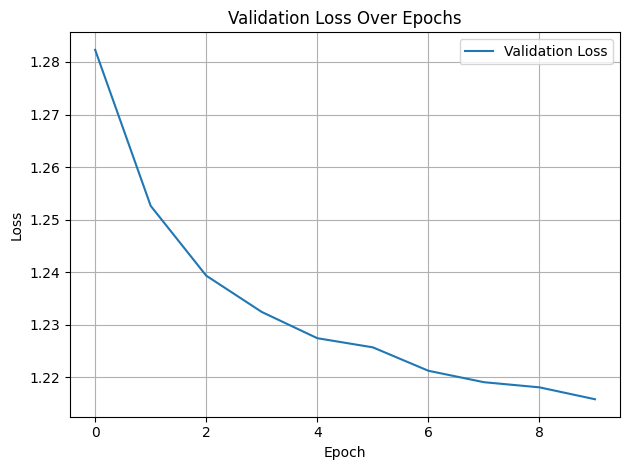

In [ ]:
from tensorflow.keras import mixed_precision


mixed_precision.set_global_policy('mixed_float16')


BATCH_SIZE = 128


train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .shuffle(5000) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)


model = build_flexible_model(len(vocab))


optimizer = mixed_precision.LossScaleOptimizer(tf.keras.optimizers.Adam(learning_rate=0.002))


model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_7 (Embedding)         │ (None, None, 64)       │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, None, 128)      │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, None, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, None, 128)      │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_7 (Cast)                   │ (None, None, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, None, 41)       │         5,289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 544,449 (2.08 MB)

 Trainable params: 181,481 (708.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 362,968 (1.38 MB)

# Experiment 3:
## Model used : Model 1
## Batch Size = 128
## Epochs = 2
## Learning Rate = 0.002

This Experiment still showed high losses.




Epoch 1/2
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 47s 9ms/step - loss: 1.6387 - val_loss: 1.2850
Epoch 2/2
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - loss: 1.3349 - val_loss: 1.2538


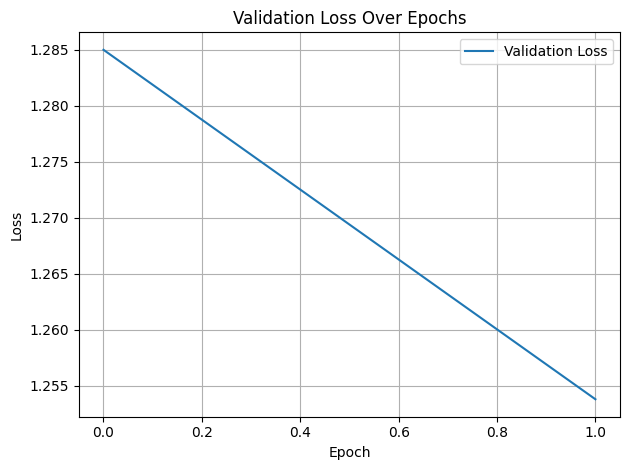

In [ ]:

from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')


BATCH_SIZE = 128

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .shuffle(5000) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)


model = build_flexible_model(len(vocab))


optimizer = mixed_precision.LossScaleOptimizer(tf.keras.optimizers.Adam(learning_rate=0.002))


model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

history = model.fit(train_ds, validation_data=val_ds, epochs=2)


import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Experiment 4:
## Model used : Model 1
## Batch Size = 128
## Epochs = 10
## Learning Rate = 0.0015

This Experiment still showed high losses.




Epoch 1/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 47s 8ms/step - loss: 1.6364 - val_loss: 1.2796
Epoch 2/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - loss: 1.3285 - val_loss: 1.2484
Epoch 3/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.3055 - val_loss: 1.2355
Epoch 4/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.2951 - val_loss: 1.2275
Epoch 5/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - loss: 1.2890 - val_loss: 1.2226
Epoch 6/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - loss: 1.2847 - val_loss: 1.2202
Epoch 7/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - loss: 1.2813 - val_loss: 1.2157
Epoch 8/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - loss: 1.2789 - val_loss: 1.2143
Epoch 9/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - loss: 1.2767 - val_loss: 1.2124
Epoch 10/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - loss: 1.2749 - val_loss: 1.2113


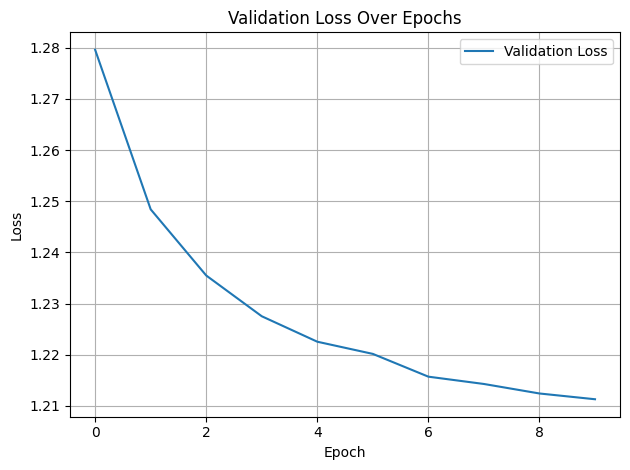

In [ ]:

from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')


BATCH_SIZE = 128


train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .shuffle(5000) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)


model = build_flexible_model(len(vocab))


optimizer = mixed_precision.LossScaleOptimizer(tf.keras.optimizers.Adam(learning_rate=0.0015))


model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

history = model.fit(train_ds, validation_data=val_ds, epochs=10)

# Plot validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import re
import string


file_path = "A Tale of Two Cities.txt"
with open(file_path, 'r', encoding='utf-8') as f:
    text = f.read()


start_marker = "*** START OF THE PROJECT GUTENBERG EBOOK A TALE OF TWO CITIES ***"
end_marker = "*** END OF THE PROJECT GUTENBERG EBOOK A TALE OF TWO CITIES ***"
start_idx = text.find(start_marker) + len(start_marker)
end_idx = text.find(end_marker)
cleaned_text = text[start_idx:end_idx].strip() if start_idx < end_idx else text.strip()

# Normalize punctuation
cleaned_text = cleaned_text.replace("’", "'").replace("‘", "'")
cleaned_text = cleaned_text.replace("“", '"').replace("”", '"')

# Lowercase
cleaned_text = cleaned_text.lower()

# Collapse dashes and ellipses
cleaned_text = re.sub(r'-{2,}', '-', cleaned_text)
cleaned_text = re.sub(r'\.{3,}', '...', cleaned_text)

# Filter allowed characters
allowed_chars = set(string.ascii_lowercase + string.digits + " .,!?:;'\"\n")
cleaned_text = ''.join(c for c in cleaned_text if c in allowed_chars)

# Normalize whitespace
cleaned_text = re.sub(r'\s+', ' ', cleaned_text)


print(cleaned_text[:500])
print(f"Cleaned character count: {len(cleaned_text):,}")


a tale of two cities a story of the french revolution by charles dickens contents book the firstrecalled to life chapter i the period chapter ii the mail chapter iii the night shadows chapter iv the preparation chapter v the wineshop chapter vi the shoemaker book the secondthe golden thread chapter i five years later chapter ii a sight chapter iii a disappointment chapter iv congratulatory chapter v the jackal chapter vi hundreds of people chapter vii monseigneur in town chapter viii monseigneur
Cleaned character count: 750,605


# Experiment 5:
## Model used : Model 1
## Batch Size = 256
## Epochs = 10
## Learning Rate = 0.002

This Experiment still showed high losses.




Using device: /device:GPU:0
Mixed precision policy: <DTypePolicy "mixed_float16">
Sample: a tale of two cities a story of the french revolution by charles dickens contents book the firstrecalled to life chapter i the period chapter ii the mail chapter iii the night shadows chapter iv the preparation chapter v the wineshop chapter vi the shoemaker book the secondthe golden thread chapter i five years later chapter ii a sight chapter iii a disappointment chapter iv congratulatory chapter v the jackal chapter vi hundreds of people chapter vii monseigneur in town chapter viii monseigneur
Total characters: 750605
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5277/5277 ━━━━━━━━━━━━━━━━━━━━ 47s 8ms/step - loss: 1.6362 - val_loss: 1.2839
Epoch 2/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.3339 - val_loss: 1.2540
Epoch 3/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.3114 - val_loss: 1.2414
Epoch 4/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.3009 - val_loss: 1.2337
Epoch 5/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.2946 - val_loss: 1.2305
Epoch 6/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.2901 - val_loss: 1.2277
Epoch 7/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.2866 - val_loss: 1.2221
Epoch 8/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.2843 - val_loss: 1.2217
Epoch 9/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.2825 - val_loss: 1.2202
Epoch 10/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.2804 - val_loss: 1.2182


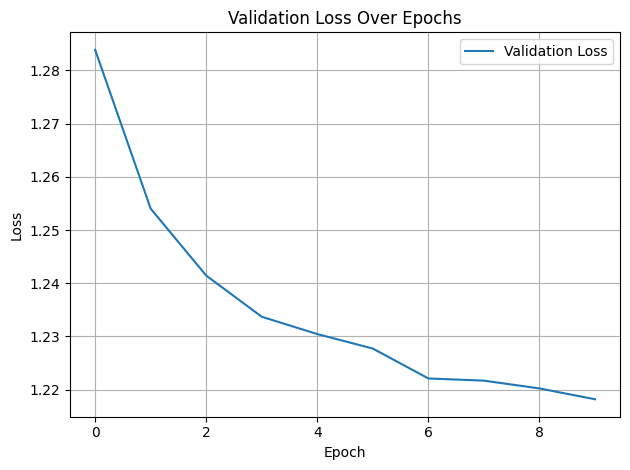

In [ ]:

import re
import string
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import mixed_precision
from sklearn.model_selection import train_test_split


mixed_precision.set_global_policy('mixed_float16')
print("Using device:", tf.test.gpu_device_name())
print("Mixed precision policy:", mixed_precision.global_policy())


file_path = "A Tale of Two Cities.txt"
with open(file_path, 'r', encoding='utf-8') as f:
    text = f.read()

start_marker = "*** START OF THE PROJECT GUTENBERG EBOOK A TALE OF TWO CITIES ***"
end_marker = "*** END OF THE PROJECT GUTENBERG EBOOK A TALE OF TWO CITIES ***"
start_idx = text.find(start_marker) + len(start_marker)
end_idx = text.find(end_marker)
cleaned_text = text[start_idx:end_idx].strip()

cleaned_text = cleaned_text.replace("’", "'").replace("‘", "'").replace("“", '"').replace("”", '"')
cleaned_text = cleaned_text.lower()
cleaned_text = re.sub(r'-{2,}', '-', cleaned_text)
cleaned_text = re.sub(r'\.{3,}', '...', cleaned_text)
allowed_chars = set(string.ascii_lowercase + string.digits + " .,!?:;'\"\n")
cleaned_text = ''.join(c for c in cleaned_text if c in allowed_chars)
cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
print("Sample:", cleaned_text[:500])
print("Total characters:", len(cleaned_text))


vocab = sorted(set(cleaned_text))
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)
encoded_text = np.array([char2idx[c] for c in cleaned_text], dtype=np.uint16)


SEQ_LENGTH = 40
input_seqs = []
target_seqs = []

for i in range(len(encoded_text) - SEQ_LENGTH):
    input_seqs.append(encoded_text[i:i+SEQ_LENGTH])
    target_seqs.append(encoded_text[i+1:i+SEQ_LENGTH+1])

input_seqs = np.array(input_seqs)
target_seqs = np.array(target_seqs)


X_train, X_val, y_train, y_val = train_test_split(input_seqs, target_seqs, test_size=0.1)


BATCH_SIZE = 256

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .shuffle(5000) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)


def build_flexible_model(vocab_size, embedding_dim=64, rnn_units=128, use_gru=True):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_shape=(None,)))
    if use_gru:
        model.add(tf.keras.layers.GRU(rnn_units, return_sequences=True))
        model.add(tf.keras.layers.Dropout(0.2))
        model.add(tf.keras.layers.GRU(rnn_units, return_sequences=True))
    else:
        model.add(tf.keras.layers.LSTM(rnn_units, return_sequences=True))
        model.add(tf.keras.layers.Dropout(0.2))
        model.add(tf.keras.layers.LSTM(rnn_units, return_sequences=True))
    model.add(tf.keras.layers.Dense(vocab_size, dtype='float32'))  # Ensure float32 output for loss
    return model


model = build_flexible_model(len(vocab))
optimizer = mixed_precision.LossScaleOptimizer(tf.keras.optimizers.Adam(learning_rate=0.002))

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

history = model.fit(train_ds, validation_data=val_ds, epochs=10)


plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Experiment 6:
## Model used : Model 1
## Batch Size = 128
## Epochs = 10
## Learning Rate = 0.01

This Experiment still showed very high losses.




Epoch 1/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 51s 9ms/step - accuracy: 0.5036 - loss: 1.6356 - val_accuracy: 0.5023 - val_loss: 1.6338
Epoch 2/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step - accuracy: 0.4821 - loss: 1.7026 - val_accuracy: 0.3423 - val_loss: 2.2315
Epoch 3/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step - accuracy: 0.3342 - loss: 2.2645 - val_accuracy: 0.3411 - val_loss: 2.2313
Epoch 4/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 49s 9ms/step - accuracy: 0.3220 - loss: 2.3177 - val_accuracy: 0.3274 - val_loss: 2.2920
Epoch 5/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step - accuracy: 0.3226 - loss: 2.3170 - val_accuracy: 0.3434 - val_loss: 2.2149
Epoch 6/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step - accuracy: 0.3331 - loss: 2.2700 - val_accuracy: 0.3451 - val_loss: 2.2477
Epoch 7/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step - accuracy: 0.3334 - loss: 2.2838 - val_accuracy: 0.3545 - val_loss: 2.1681
Epoch 8/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step - accuracy: 0.3492 - loss: 2

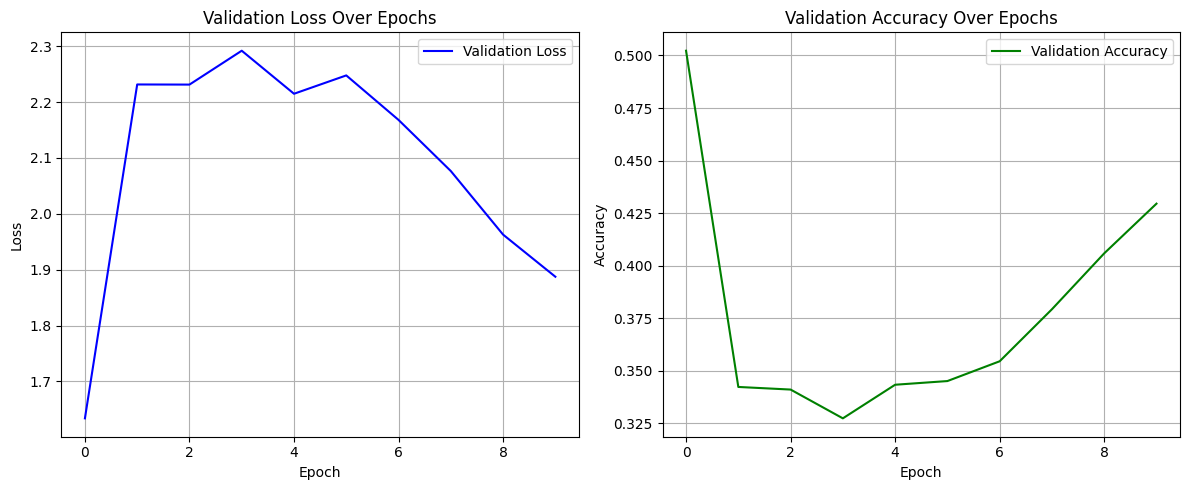

In [ ]:
from tensorflow.keras import mixed_precision


mixed_precision.set_global_policy('mixed_float16')


BATCH_SIZE = 128


train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .shuffle(5000) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)


model = build_flexible_model(len(vocab))


optimizer = mixed_precision.LossScaleOptimizer(tf.keras.optimizers.Adam(learning_rate=0.01))
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


history = model.fit(train_ds, validation_data=val_ds, epochs=10)


plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.title("Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title("Validation Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Model 2

# Model 2: Bidirectional GRU Model

This model uses a **Bidirectional GRU** layer for sequence processing and is designed for text generation.

## Architecture:
1. **Input Layer**: Takes integer-encoded sequences with variable length.
2. **Embedding Layer**: Converts input tokens into dense vectors of size **32**.
3. **Bidirectional GRU**: A **GRU** layer with **64 units** processes the input sequence in both forward and backward directions, capturing context from both ends.
4. **Dropout Layer**: Optionally applies **Dropout (0.2)** to prevent overfitting.
5. **Dense Output Layer**: Outputs a probability distribution over the vocabulary.






In [ ]:
def build_bidirectional_gru_model(vocab_size, embedding_dim=32, rnn_units=64, use_dropout=True):
    inputs = tf.keras.Input(shape=(None,), dtype=tf.int32)
    x = tf.keras.layers.Embedding(vocab_size, embedding_dim)(inputs)

    # Bidirectional GRU
    x = tf.keras.layers.Bidirectional(
        tf.keras.layers.GRU(rnn_units, return_sequences=True)
    )(x)

    if use_dropout:
        x = tf.keras.layers.Dropout(0.2)(x)


    outputs = tf.keras.layers.Dense(vocab_size, dtype='float32')(x)

    return tf.keras.Model(inputs, outputs)


# Experiment 7
## Model used : Model 2
## Batch Size = 128
## Epochs = 10
## Learning Rate = 0.002

This Experiment showed small losses and high accuracy.




In [ ]:
from tensorflow.keras import mixed_precision


mixed_precision.set_global_policy('mixed_float16')


BATCH_SIZE = 128


train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .shuffle(5000) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)


model = build_bidirectional_gru_model(len(vocab))


optimizer = mixed_precision.LossScaleOptimizer(
    tf.keras.optimizers.Adam(learning_rate=0.002)
)

# Compile and train
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - accuracy: 0.9385 - loss: 0.2431 - val_accuracy: 0.9871 - val_loss: 0.0430
Epoch 2/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9868 - loss: 0.0444 - val_accuracy: 0.9877 - val_loss: 0.0408
Epoch 3/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.9872 - loss: 0.0425 - val_accuracy: 0.9879 - val_loss: 0.0400
Epoch 4/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.9875 - loss: 0.0418 - val_accuracy: 0.9880 - val_loss: 0.0396
Epoch 5/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.9876 - loss: 0.0414 - val_accuracy: 0.9881 - val_loss: 0.0392
Epoch 6/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.9876 - loss: 0.0410 - val_accuracy: 0.9882 - val_loss: 0.0390
Epoch 7/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9877 - loss: 0.0409 - val_accuracy: 0.9882 - val_loss: 0.0389
Epoch 8/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9878 - loss: 0

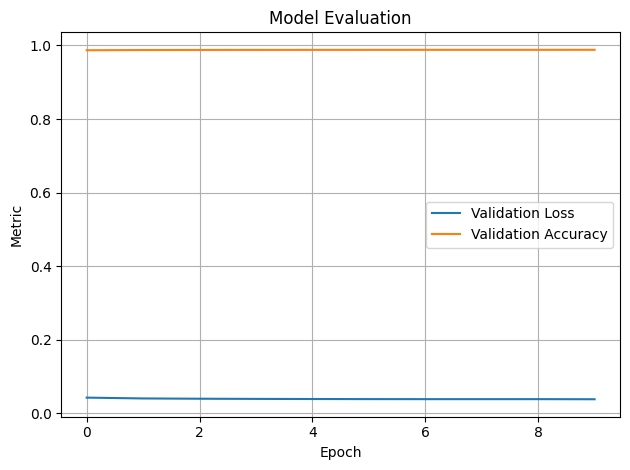

In [ ]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Evaluation")
plt.xlabel("Epoch")
plt.ylabel("Metric")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Experiment 7
## Model used : Model 2
## Batch Size = 128
## Epochs = 10
## Learning Rate = 0.01

This Experiment showed small losses and high accuracy.




In [ ]:
from tensorflow.keras import mixed_precision


mixed_precision.set_global_policy('mixed_float16')


BATCH_SIZE = 128


train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .shuffle(5000) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)


model = build_bidirectional_gru_model(len(vocab))


optimizer = mixed_precision.LossScaleOptimizer(
    tf.keras.optimizers.Adam(learning_rate=0.01)
)


model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - accuracy: 0.9394 - loss: 0.2419 - val_accuracy: 0.9870 - val_loss: 0.0431
Epoch 2/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9867 - loss: 0.0444 - val_accuracy: 0.9876 - val_loss: 0.0409
Epoch 3/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9872 - loss: 0.0425 - val_accuracy: 0.9878 - val_loss: 0.0400
Epoch 4/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9874 - loss: 0.0417 - val_accuracy: 0.9880 - val_loss: 0.0395
Epoch 5/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9875 - loss: 0.0413 - val_accuracy: 0.9881 - val_loss: 0.0393
Epoch 6/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9876 - loss: 0.0410 - val_accuracy: 0.9881 - val_loss: 0.0391
Epoch 7/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9877 - loss: 0.0408 - val_accuracy: 0.9882 - val_loss: 0.0390
Epoch 8/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9877 - loss: 0

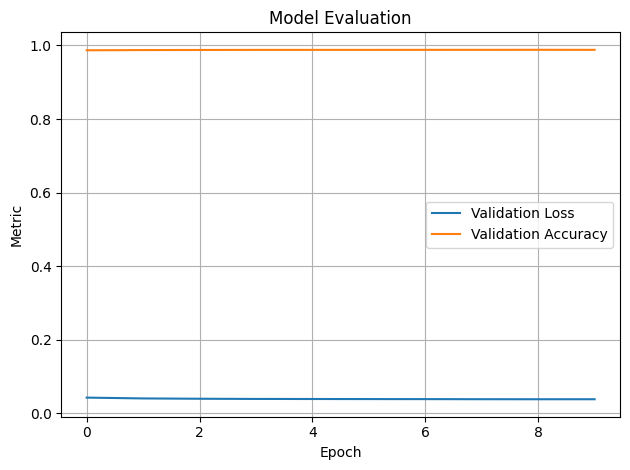

In [ ]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Evaluation")
plt.xlabel("Epoch")
plt.ylabel("Metric")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Experiment 8
## Model used : Model 2
## Batch Size = 256
## Epochs = 10
## Learning Rate = 0.002

This Experiment showed small losses and high accuracy.But for some epochs it showed loss as nan, This can be due to high learning rate and exploding gradients. So this experiment is not optimal.




In [ ]:
from tensorflow.keras import mixed_precision


mixed_precision.set_global_policy('mixed_float16')


BATCH_SIZE = 256


train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .shuffle(5000) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)


model = build_bidirectional_gru_model(len(vocab))


optimizer = mixed_precision.LossScaleOptimizer(
    tf.keras.optimizers.Adam(learning_rate=0.002)
)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 47s 8ms/step - accuracy: 0.9396 - loss: 0.2386 - val_accuracy: 0.9871 - val_loss: 0.0428
Epoch 2/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.9868 - loss: 0.0443 - val_accuracy: 0.9877 - val_loss: 0.0407
Epoch 3/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.9872 - loss: 0.0425 - val_accuracy: 0.9878 - val_loss: 0.0400
Epoch 4/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.9874 - loss: 0.0417 - val_accuracy: 0.9880 - val_loss: 0.0396
Epoch 5/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.9876 - loss: 0.0413 - val_accuracy: 0.9881 - val_loss: 0.0392
Epoch 6/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.9877 - loss: 0.0410 - val_accuracy: 0.9882 - val_loss: 0.0389
Epoch 7/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.9877 - loss: 0.0408 - val_accuracy: 0.9882 - val_loss: 0.0389
Epoch 8/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.9155 - loss: n

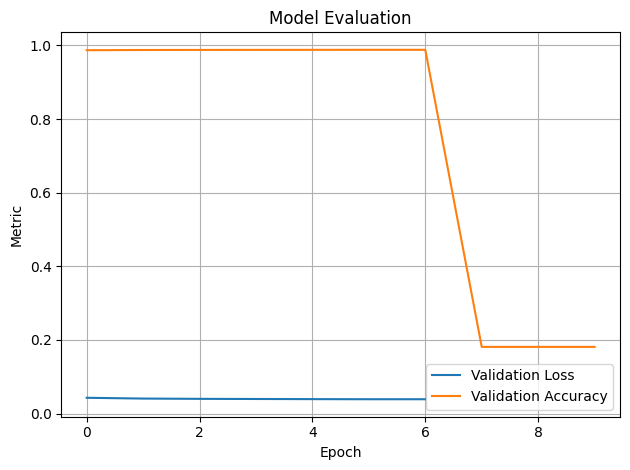

In [ ]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Evaluation")
plt.xlabel("Epoch")
plt.ylabel("Metric")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Experiment 9
## Model used : Model 2
## Batch Size = 256
## Epochs = 10
## Learning Rate = 0.01

This Experiment showed small losses and high accuracy.




In [ ]:
from tensorflow.keras import mixed_precision


mixed_precision.set_global_policy('mixed_float16')


BATCH_SIZE = 256


train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .shuffle(5000) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)


model = build_bidirectional_gru_model(len(vocab))


optimizer = mixed_precision.LossScaleOptimizer(
    tf.keras.optimizers.Adam(learning_rate=0.01)
)


model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - accuracy: 0.9417 - loss: 0.2348 - val_accuracy: 0.9871 - val_loss: 0.0429
Epoch 2/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9868 - loss: 0.0444 - val_accuracy: 0.9877 - val_loss: 0.0408
Epoch 3/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9872 - loss: 0.0426 - val_accuracy: 0.9879 - val_loss: 0.0401
Epoch 4/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9875 - loss: 0.0418 - val_accuracy: 0.9880 - val_loss: 0.0396
Epoch 5/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9876 - loss: 0.0413 - val_accuracy: 0.9881 - val_loss: 0.0393
Epoch 6/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9876 - loss: 0.0410 - val_accuracy: 0.9881 - val_loss: 0.0392
Epoch 7/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9877 - loss: 0.0408 - val_accuracy: 0.9882 - val_loss: 0.0390
Epoch 8/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9877 - loss: 0

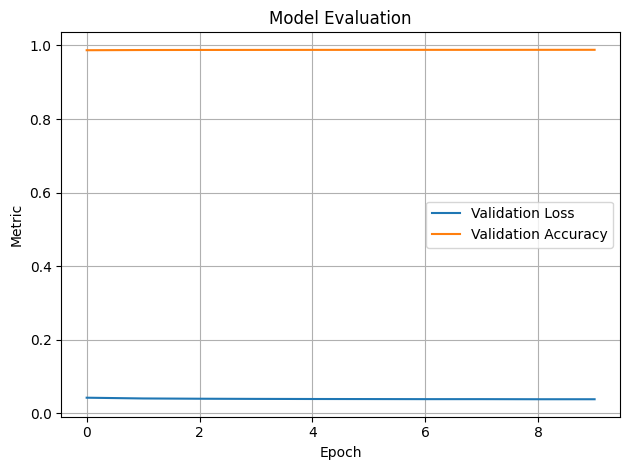

In [ ]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Evaluation")
plt.xlabel("Epoch")
plt.ylabel("Metric")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##Model 3

- **Embedding Layer**: Converts token indices into dense vectors of size 64.
- **Bidirectional LSTM (1st layer)**: 128 units, processes sequences both forwards and backwards.
- **Dropout**: 30% rate applied after the bidirectional LSTM.
- **Unidirectional LSTM (2nd layer)**: 128 units, processes sequences in one direction.
- **Dropout**: 30% rate applied after the unidirectional LSTM.
- **Dense Output Layer**: Produces a probability distribution over the vocabulary for each timestep, with output size equal to `vocab_size`.


In [ ]:
def build_accurate_fast_model(vocab_size, embedding_dim=64, rnn_units=128):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=(None,)),

        # 1st Bidirectional LSTM Layer
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(rnn_units, return_sequences=True)),
        tf.keras.layers.Dropout(0.3),

        # 2nd Unidirectional LSTM Layer
        tf.keras.layers.LSTM(rnn_units, return_sequences=True),
        tf.keras.layers.Dropout(0.3),


        tf.keras.layers.Dense(vocab_size, dtype='float32')  # This is critical
    ])
    return model


# Experiment 10
## Model used : Model 3
## Batch Size = 128
## Epochs = 10
## Learning Rate = 0.002

This Experiment showed small losses and high accuracy.




In [ ]:
from tensorflow.keras import mixed_precision


mixed_precision.set_global_policy('mixed_float16')


BATCH_SIZE = 128


train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .shuffle(5000) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)


model = build_accurate_fast_model(len(vocab))


optimizer = mixed_precision.LossScaleOptimizer(
    tf.keras.optimizers.Adam(learning_rate=0.002)
)


model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train
history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 65s 12ms/step - accuracy: 0.9264 - loss: 0.2777 - val_accuracy: 0.9879 - val_loss: 0.0395
Epoch 2/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.9877 - loss: 0.0409 - val_accuracy: 0.9887 - val_loss: 0.0365
Epoch 3/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.9883 - loss: 0.0384 - val_accuracy: 0.9890 - val_loss: 0.0353
Epoch 4/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.9886 - loss: 0.0374 - val_accuracy: 0.9891 - val_loss: 0.0347
Epoch 5/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.9887 - loss: 0.0368 - val_accuracy: 0.9892 - val_loss: 0.0343
Epoch 6/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.9888 - loss: 0.0363 - val_accuracy: 0.9893 - val_loss: 0.0340
Epoch 7/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.9889 - loss: 0.0360 - val_accuracy: 0.9893 - val_loss: 0.0339
Epoch 8/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.9890 -

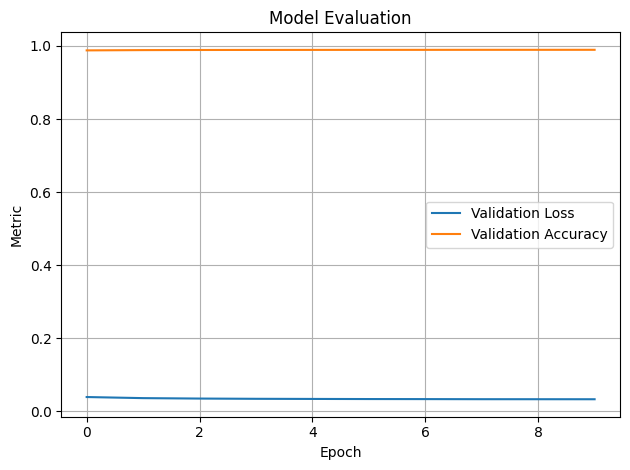

In [ ]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Evaluation")
plt.xlabel("Epoch")
plt.ylabel("Metric")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Experiment 11
## Model used : Model 3
## Batch Size = 128
## Epochs = 10
## Learning Rate = 0.01

This Experiment showed small losses and high accuracy.




In [ ]:
from tensorflow.keras import mixed_precision


mixed_precision.set_global_policy('mixed_float16')


BATCH_SIZE = 128


train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .shuffle(5000) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)


model = build_accurate_fast_model(len(vocab))


optimizer = mixed_precision.LossScaleOptimizer(
    tf.keras.optimizers.Adam(learning_rate=0.01)
)


model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train
history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 66s 12ms/step - accuracy: 0.9257 - loss: 0.2813 - val_accuracy: 0.9879 - val_loss: 0.0395
Epoch 2/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.9876 - loss: 0.0413 - val_accuracy: 0.9886 - val_loss: 0.0366
Epoch 3/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.9882 - loss: 0.0387 - val_accuracy: 0.9890 - val_loss: 0.0354
Epoch 4/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.9885 - loss: 0.0376 - val_accuracy: 0.9891 - val_loss: 0.0348
Epoch 5/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.9887 - loss: 0.0369 - val_accuracy: 0.9892 - val_loss: 0.0343
Epoch 6/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.9888 - loss: 0.0365 - val_accuracy: 0.9893 - val_loss: 0.0340
Epoch 7/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.9889 - loss: 0.0362 - val_accuracy: 0.9894 - val_loss: 0.0338
Epoch 8/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.9889 -

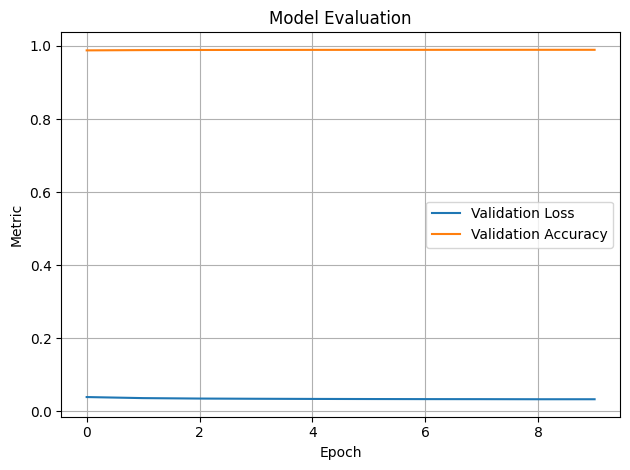

In [ ]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Evaluation")
plt.xlabel("Epoch")
plt.ylabel("Metric")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Experiment 12
## Model used : Model 3
## Batch Size = 64
## Epochs = 10
## Learning Rate = 0.002

This Experiment showed small losses and high accuracy.For some epochs the losses are nan it means high learning rate or gradient exploding so this experiment is not optimal.




In [ ]:
from tensorflow.keras import mixed_precision


mixed_precision.set_global_policy('mixed_float16')


BATCH_SIZE = 64


train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .shuffle(5000) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)


model = build_accurate_fast_model(len(vocab))


optimizer = mixed_precision.LossScaleOptimizer(
    tf.keras.optimizers.Adam(learning_rate=0.002)
)


model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train
history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 68s 12ms/step - accuracy: 0.9274 - loss: 0.2733 - val_accuracy: 0.9879 - val_loss: 0.0392
Epoch 2/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 63s 12ms/step - accuracy: 0.9876 - loss: 0.0410 - val_accuracy: 0.9886 - val_loss: 0.0365
Epoch 3/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 63s 12ms/step - accuracy: 0.9883 - loss: 0.0386 - val_accuracy: 0.9890 - val_loss: 0.0353
Epoch 4/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 64s 12ms/step - accuracy: 0.9885 - loss: 0.0375 - val_accuracy: 0.9891 - val_loss: 0.0347
Epoch 5/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 64s 12ms/step - accuracy: 0.9887 - loss: 0.0369 - val_accuracy: 0.9892 - val_loss: 0.0343
Epoch 6/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 64s 12ms/step - accuracy: 0.9888 - loss: 0.0364 - val_accuracy: 0.9893 - val_loss: 0.0340
Epoch 7/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 64s 12ms/step - accuracy: 0.9889 - loss: 0.0361 - val_accuracy: 0.9894 - val_loss: 0.0338
Epoch 8/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 55s 10ms/step - accuracy: 0.6117 -

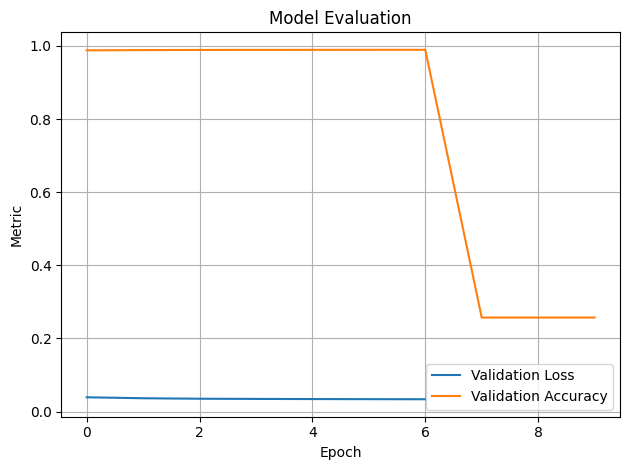

In [ ]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Evaluation")
plt.xlabel("Epoch")
plt.ylabel("Metric")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Experiment 13
## Model used : Model 3
## Batch Size = 64
## Epochs = 10
## Learning Rate = 0.01

This Experiment showed small losses and high accuracy.For some epochs the losses are nan it means high learning rate or gradient exploding so this experiment is not optimal.




In [ ]:
from tensorflow.keras import mixed_precision


mixed_precision.set_global_policy('mixed_float16')


BATCH_SIZE = 64


train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .shuffle(5000) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)


model = build_accurate_fast_model(len(vocab))

optimizer = mixed_precision.LossScaleOptimizer(
    tf.keras.optimizers.Adam(learning_rate=0.01)
)


model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 68s 12ms/step - accuracy: 0.9274 - loss: 0.2744 - val_accuracy: 0.9879 - val_loss: 0.0394
Epoch 2/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 65s 12ms/step - accuracy: 0.9877 - loss: 0.0410 - val_accuracy: 0.9888 - val_loss: 0.0362
Epoch 3/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 65s 12ms/step - accuracy: 0.9883 - loss: 0.0385 - val_accuracy: 0.9891 - val_loss: 0.0351
Epoch 4/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 65s 12ms/step - accuracy: 0.9886 - loss: 0.0374 - val_accuracy: 0.9891 - val_loss: 0.0346
Epoch 5/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 65s 12ms/step - accuracy: 0.9887 - loss: 0.0367 - val_accuracy: 0.9893 - val_loss: 0.0341
Epoch 6/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 65s 12ms/step - accuracy: 0.9888 - loss: 0.0363 - val_accuracy: 0.9894 - val_loss: 0.0339
Epoch 7/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 65s 12ms/step - accuracy: 0.9889 - loss: 0.0360 - val_accuracy: 0.9894 - val_loss: 0.0337
Epoch 8/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 61s 12ms/step - accuracy: 0.9678 -

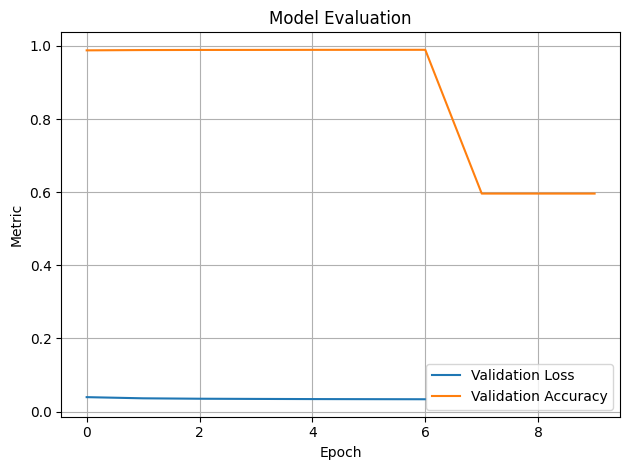

In [ ]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Evaluation")
plt.xlabel("Epoch")
plt.ylabel("Metric")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Best Model: Architecture and Hyperparameters

## Hyperparameters:
- **Epochs**: 10
  - The model was trained for **10 epochs**, providing enough time for the model to learn the patterns in the data while avoiding overfitting.
  
- **Learning Rate (lr)**: 0.002
  - A learning rate of **0.002** was used, providing a balance between fast convergence and stable training. This learning rate was chosen to ensure the model does not diverge while updating the weights efficiently.
  
- **Batch Size**: 128
  - The **batch size of 128** was used for training, allowing the model to process a reasonable number of examples per training step. Larger batch sizes help stabilize training and reduce variance in weight updates.

---

## Model Architecture:

The model consists of several layers aimed at improving performance and efficiency. Here's a breakdown:

1. **Embedding Layer**:
   - The **Embedding layer** maps the input tokens (characters) to dense vectors of size **64**. This reduces the dimensionality of the input and allows the model to capture semantic relationships between characters.
   - `input_dim=vocab_size` defines the size of the vocabulary, and `output_dim=embedding_dim` specifies the dimensionality of the dense vector for each token.

2. **Bidirectional LSTM Layer**:
   - A **Bidirectional LSTM layer** is used to capture patterns in both forward and backward directions of the sequence. This layer processes the input sequence from both ends, which helps the model understand context better, especially for sequential tasks like text generation.
   - `rnn_units=128` defines the number of units in the LSTM cell, while `return_sequences=True` ensures that the LSTM outputs the full sequence of hidden states.

3. **Dropout Layers**:
   - **Dropout (0.3)** is applied after both LSTM layers to prevent overfitting. During training, 30% of the neurons are randomly dropped, which helps the model generalize better and avoid memorizing the training data.

4. **Unidirectional LSTM Layer**:
   - A second **Unidirectional LSTM layer** is added to further capture sequential dependencies. It is followed by another **Dropout layer** to prevent overfitting and stabilize training.
   
5. **Dense Output Layer**:
   - The final **Dense layer** with `vocab_size` units outputs the probabilities for each possible next character in the sequence.
   - **dtype='float32'** ensures that the output is compatible with mixed precision, improving performance during training.

---

## Model Summary:
- The **Bidirectional LSTM layer** helps the model capture contextual dependencies from both directions, improving its understanding of the sequence.
- The **Unidirectional LSTM layer** further refines the model's predictions by processing the sequence.
- **Dropout** layers are added to prevent overfitting and help the model generalize better.
- The **Dense output layer** produces the model's predictions for the next character in the sequence.

This model configuration strikes a balance between speed and accuracy, using mixed precision to speed up training while ensuring stable and effective learning.


In [ ]:
# The below Model is the Best model we selected from our experimentation above.

In [ ]:
def build_accurate_fast_model(vocab_size, embedding_dim=64, rnn_units=128):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=(None,)),


        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(rnn_units, return_sequences=True)),
        tf.keras.layers.Dropout(0.3),


        tf.keras.layers.LSTM(rnn_units, return_sequences=True),
        tf.keras.layers.Dropout(0.3),


        tf.keras.layers.Dense(vocab_size, dtype='float32')
    ])
    return model


In [ ]:
from tensorflow.keras import mixed_precision


mixed_precision.set_global_policy('mixed_float16')


BATCH_SIZE = 128


train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .shuffle(5000) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(tf.data.AUTOTUNE)

model = build_bidirectional_gru_model(len(vocab))


optimizer = mixed_precision.LossScaleOptimizer(
    tf.keras.optimizers.Adam(learning_rate=0.002)
)


model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - accuracy: 0.9385 - loss: 0.2431 - val_accuracy: 0.9871 - val_loss: 0.0430
Epoch 2/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9868 - loss: 0.0444 - val_accuracy: 0.9877 - val_loss: 0.0408
Epoch 3/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.9872 - loss: 0.0425 - val_accuracy: 0.9879 - val_loss: 0.0400
Epoch 4/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.9875 - loss: 0.0418 - val_accuracy: 0.9880 - val_loss: 0.0396
Epoch 5/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.9876 - loss: 0.0414 - val_accuracy: 0.9881 - val_loss: 0.0392
Epoch 6/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.9876 - loss: 0.0410 - val_accuracy: 0.9882 - val_loss: 0.0390
Epoch 7/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9877 - loss: 0.0409 - val_accuracy: 0.9882 - val_loss: 0.0389
Epoch 8/10
5277/5277 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9878 - loss: 0

##Hyperparameter Tuning Approach

To improve model performance, I fine tuned key hyperparameters using  **experiments

1. **Batch Size**  
   I tested different batch sizes (64, 128,256) and selected **128** because it provided faster training and stable results.

2. **Learning Rate**  
   I started with the default `0.001` and gradually increased it. A **learning rate of `0.002`** allowed the model to converge faster while still being stable. I monitored training and validation loss to confirm this.

3. **Number of Epochs**  
   I trained the model for 2,3,4,5, 10, and epochs. Validation loss stopped improving significantly after 10 epochs, so I chose **10 epochs** to avoid overfitting and save training time.


